In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_cv = pd.read_csv('Arquivos TCC/perfomance_cv.csv')
df_cv = df_cv.drop_duplicates(subset=['pipeline'], keep='last')
df_cv[['dataset','embedding','ml_alg']] = df_cv['pipeline'].str.split('+',expand=True)
df_cv.columns

Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'pipeline', 'params', 'dataset', 'embedding',
       'ml_alg'],
      dtype='object')

In [3]:
#df_cva

In [4]:
df_melt=pd.melt(df_cv, id_vars=['params','pipeline','dataset','embedding','ml_alg'],value_vars=['split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score','split5_test_score','split6_test_score', 'split7_test_score','split8_test_score','split9_test_score'],var_name='split',value_name='acc_split')


In [5]:
datasets = df_melt['dataset'].unique()

In [6]:
datasets

array(['TC02_20news', 'TC14_wos'], dtype=object)

Text(0, 0.5, 'Acurácia Balanceada')

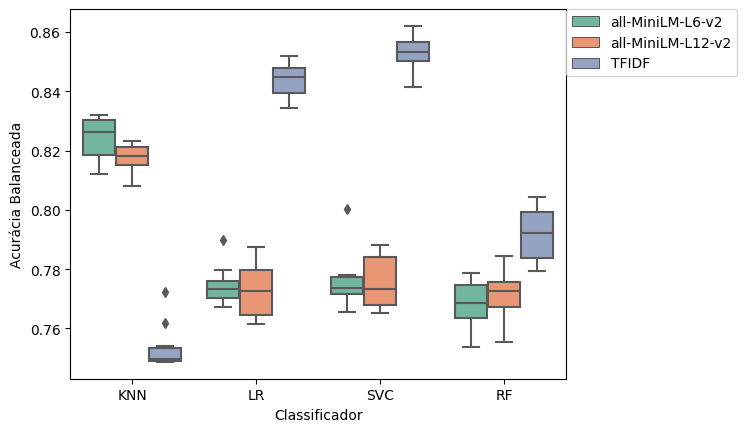

In [7]:
dataset = datasets[0]
sns.boxplot(x = df_melt[df_melt['dataset'] == dataset]['ml_alg'],
            y = df_melt[df_melt['dataset'] == dataset]['acc_split'],
            hue = df_melt[df_melt['dataset'] == dataset]['embedding'],
            palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xlabel('Classificador')
plt.ylabel('Acurácia Balanceada')

Text(0, 0.5, 'Acurácia Balanceada')

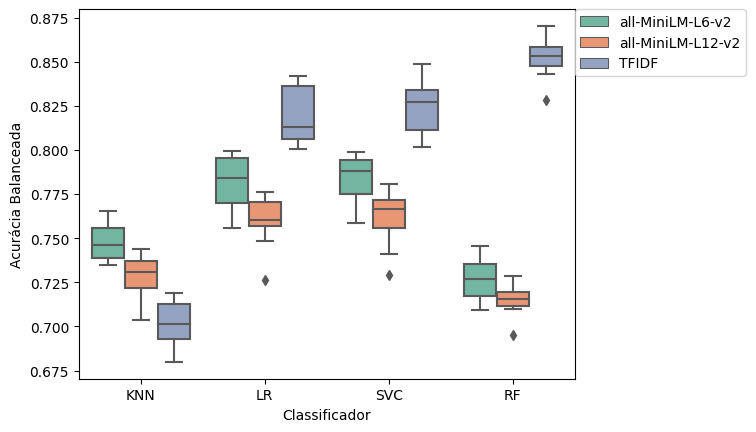

In [8]:
dataset = datasets[1]
sns.boxplot(x = df_melt[df_melt['dataset'] == dataset]['ml_alg'],
            y = df_melt[df_melt['dataset'] == dataset]['acc_split'],
            hue = df_melt[df_melt['dataset'] == dataset]['embedding'],
            palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xlabel('Classificador')
plt.ylabel('Acurácia Balanceada')

In [9]:
def plot_confusion_matrix(data, labels, output_filename):
    import seaborn
    import matplotlib.pyplot as plt
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(12, 9))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    plt.xticks(rotation=90)
    ax.set_yticklabels(labels)
    plt.yticks(rotation=360)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()

In [10]:
import pandas as pd
import numpy as np
import json
best_pipes = ["TC02_20news+TFIDF+SVC","TC14_wos+TFIDF+RF"]
confusion_matrix_20news = np.genfromtxt(f'Arquivos TCC/confusion_matrix/{best_pipes[0]}.csv', delimiter=',')
confusion_matrix_wos = np.genfromtxt(f'Arquivos TCC/confusion_matrix/{best_pipes[1]}.csv', delimiter=',')
with open("20news_label_map.json", "r") as read_file:
    label_map_20news = json.load(read_file)
with open("wos_label_map.json", "r") as read_file:
    label_map_wos = json.load(read_file)
    label_map_wos = {int(k):v for k,v in label_map_wos.items()}

labels_20news = label_map_20news.values()
labels_wos = dict(sorted(label_map_wos.items())).values()
dict(sorted(label_map_wos.items()))

plot_confusion_matrix(confusion_matrix_20news, labels_20news, '20news_best_conf_matrix.png')
plot_confusion_matrix(confusion_matrix_wos, labels_wos, 'wos_best_conf_matrix.png')


In [15]:
print(labels_wos)

dict_values(['Computer vision', 'Machine learning', 'network security', 'Cryptography', 'Operating systems', 'Electricity', 'Electrical circuits', 'Digital control', 'Prejudice', 'Social cognition', 'Person perception', 'Nonverbal communication', 'Prosocial behavior', 'computer-aided design', 'Hydraulics', 'Manufacturing engineering', 'Machine design', 'Fluid mechanics', 'Ambient Intelligence', 'Highway Network System', 'Remote Sensing', 'Rainwater Harvesting', 'Water Pollution', 'Addiction', 'Allergies', "Alzheimer's Disease", 'Ankylosing Spondylitis', 'Anxiety', 'Molecular biology', 'Cell biology', 'Human Metabolism', 'Immunology', 'Genetics'])


In [12]:
label_map_wos = {int(k):v for k,v in label_map_wos.items()}